In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [5]:
product_df = pd.read_csv('data/product.csv')

In [19]:
product_df

,Unnamed: 0,Product ID,Country,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Coffee Type,Roast Type,Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
123,123,R-M-0.5,United Kingdom,5.970,0.35820,0.06,0.5,Rob,M,1.1940,16.0,254.0,0.062992,95.520,5.73120,8.0,217.2,0.036832
74,74,L-L-0.2,United Kingdom,4.755,0.61815,0.13,0.2,Lib,L,2.3775,16.0,254.0,0.062992,76.080,9.89040,3.2,217.2,0.014733
107,107,R-L-0.2,Ireland,3.585,0.21510,0.06,0.2,Rob,L,1.7925,30.0,537.0,0.055866,107.550,6.45300,6.0,544.3,0.011023
52,52,E-M-0.2,United Kingdom,4.125,0.45375,0.11,0.2,Exc,M,2.0625,14.0,254.0,0.055118,57.750,6.35250,2.8,217.2,0.012891
43,43,E-L-0.5,United Kingdom,8.910,0.98010,0.11,0.5,Exc,L,1.7820,13.0,254.0,0.051181,115.830,12.74130,6.5,217.2,0.029926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,R-D-0.5,Ireland,5.370,0.32220,0.06,0.5,Rob,D,1.0740,3.0,537.0,0.005587,16.110,0.96660,1.5,544.3,0.002756
26,26,A-M-2.5,Ireland,25.875,2.32875,0.09,2.5,Ara,M,1.0350,3.0,537.0,0.005587,77.625,6.98625,7.5,544.3,0.013779
12,12,A-L-0.5,United Kingdom,7.770,0.69930,0.09,0.5,Ara,L,1.5540,1.0,254.0,0.003937,7.770,0.69930,0.5,217.2,0.002302
85,85,L-M-0.2,Ireland,4.365,0.56745,0.13,0.2,Lib,M,2.1825,2.0,537.0,0.003724,8.730,1.13490,0.4,544.3,0.000735


I am adding new feature columns related to the current data already available to be able to look at the products in a different way than already recorded. These columns may be useful in solving questions or problems for other businesses looking to get into coffee sales.

In [17]:
product_df['Total Quantity'] = product_df.groupby('Country')['Quantity'].transform('sum')
product_df['Percent Purchased'] = product_df['Quantity'] / product_df['Total Quantity']
product_df['Total Unit Sales'] = product_df['Unit Price'] * product_df['Quantity']
product_df ['Total Unit Profit'] = product_df['Unit Profit'] * product_df['Quantity']
product_df['Total Unit Weight Sold'] = product_df['Unit Weight(kg)'] * product_df['Quantity']
product_df['Total Weight'] = product_df.groupby('Country')['Total Unit Weight Sold'].transform('sum')
product_df['Percent of Total Weight Shipped'] = product_df['Total Unit Weight Sold'] / product_df['Total Weight']

In [18]:
product_df.sort_values(by='Percent Purchased', ascending=False, inplace=True )

### Favorite Coffee by Country
In order to gain some meaningful insights about Coffee purchased from this seller, I would like to first break down the products by the Country they were purchased in.

In [15]:
ireland_prod = product_df[product_df['Country'] == 'Ireland'].head(10)
uk_prod= product_df[product_df['Country'] == 'United Kingdom'].head(10)
us_prod= product_df[product_df['Country'] == 'United States'].head(10)

### United States

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

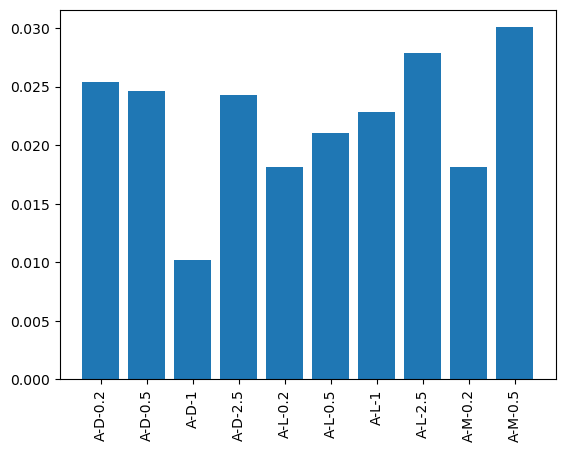

In [16]:
plt.bar(us_prod['Product ID'], us_prod['Percent Purchased'])
plt.xticks(rotation=90)